In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Predicting card category

In [2]:
bank=pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
bank.shape

(10127, 23)

In [4]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
### So we will be needing to extrct data from income_Category columns and other
# catergorical columns, since as you cansee the data is in string format and te 
# the range is giving, not an exact value which can be feede into te model directly 

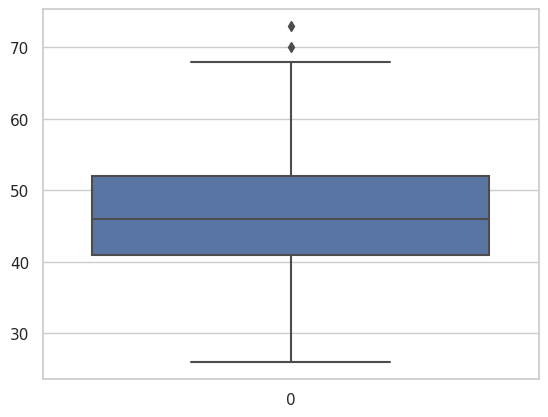

In [7]:
sns.set_theme(style='whitegrid')
sns.boxplot(bank['Customer_Age'])
plt.show()

most of the customers are somewhere near 40 years age, some outlier that are depicted by the dots on the right hand side at the age 70 and maybe 75

In [9]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [10]:
bank[['Gender', 'Avg_Utilization_Ratio']].groupby('Gender').agg(['mean','count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [11]:
bank[['Gender', 'Credit_Limit']].groupby('Gender').agg(['mean','count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [12]:
bank_cards=bank.groupby('Card_Category')
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

In [13]:
bank_cards=bank.groupby('Card_Category')
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [14]:
bank_cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [15]:
bank_marital=bank.groupby('Marital_Status')

In [16]:
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: count, dtype: int64

Now lets move forward and see if we have categorical data in our dataset

In [17]:
bank.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [18]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [19]:
bank['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [20]:
bank['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [21]:
bank['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [22]:
def ref1(x):
    if x=='M':
        return 1
    else:
        return 0
bank['Gender'] = bank['Gender'].map(ref1)

In [23]:
bank['Gender'].value_counts()

Gender
0    5358
1    4769
Name: count, dtype: int64

In [24]:
def ref2(x):
    if x=='Existing Customer':
        return 1
    else:
        return 0
bank['Attrition_Flag'] = bank['Attrition_Flag'].map(ref2)

In [25]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [26]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [27]:
# Converting categorical data into numerical data
y=bank['Card_Category']
x=bank.copy()

In [28]:
x.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [29]:
x['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder 

def label_encoder(feat):
    le=LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

In [31]:
x['Income_Category']=label_encoder(x['Income_Category'])
x.head()

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,High School,Married,2,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,Graduate,Married,3,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,High School,Unknown,4,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,Uneducated,Married,2,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [32]:
x['Income_Category'].value_counts()

Income_Category
4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: count, dtype: int64

In [33]:
x['Education_Level']=label_encoder(x['Education_Level'])
x['Marital_Status']=label_encoder(x['Marital_Status'])
x.head()

Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,4,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,4,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  int64  
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [35]:
x= x.drop(['CLIENTNUM','Card_Category'], axis=1)
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,3,1,2,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [36]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,3,1,2,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [37]:
x.shape

(10127, 21)

In [38]:
y.value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [39]:
y=bank[['Card_Category']]
y

,Card_Category
0,Blue
1,Blue
2,Blue
3,Blue
4,Blue
...,...
10122,Blue
10123,Blue
10124,Blue
10125,Blue


In [40]:
y['Card_Category']=label_encoder(y['Card_Category'])
y.head()

Card_Category ['Blue' 'Gold' 'Platinum' 'Silver']


,Card_Category
0,0
1,0
2,0
3,0
4,0


In [41]:
y['Card_Category'].value_counts()

Card_Category
0    9436
3     555
1     116
2      20
Name: count, dtype: int64

In [42]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,3,1,2,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [43]:
x.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,...,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,...,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,...,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,...,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,...,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,...,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,...,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


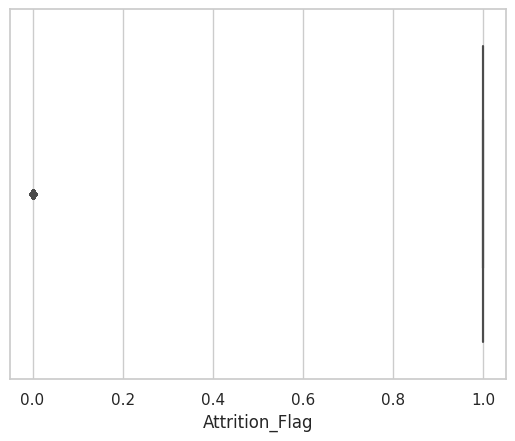

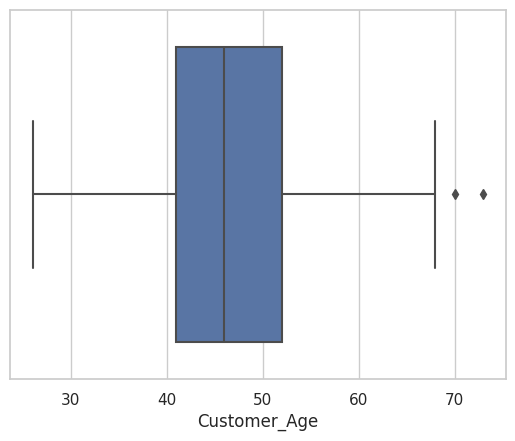

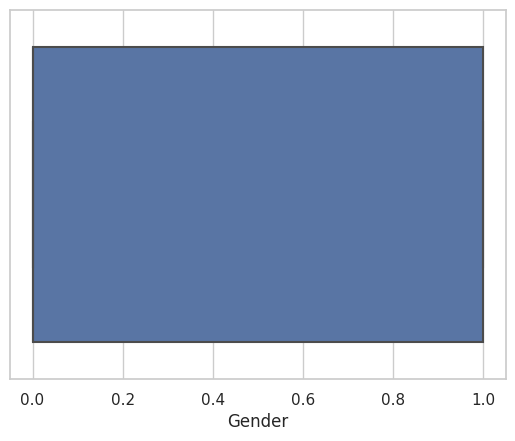

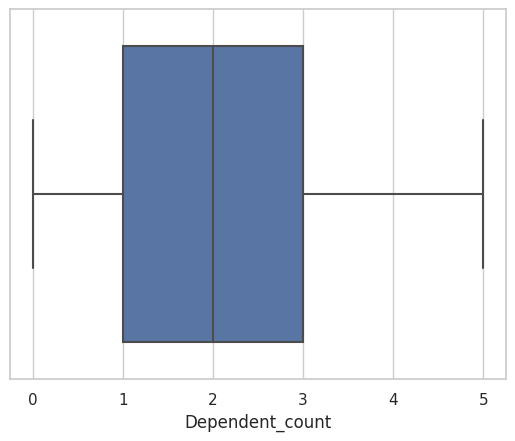

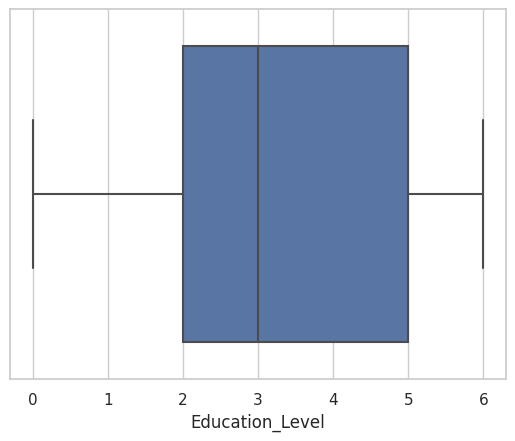

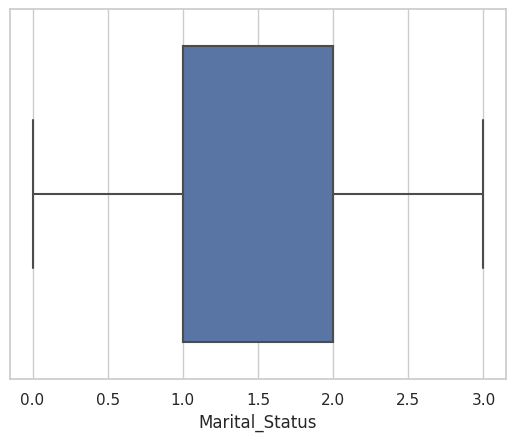

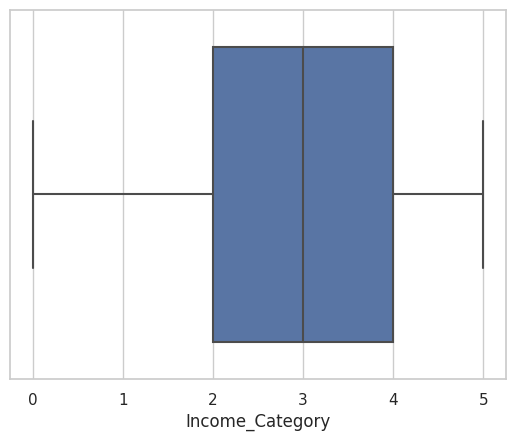

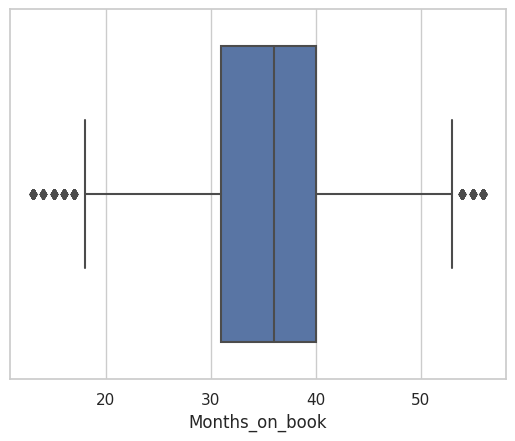

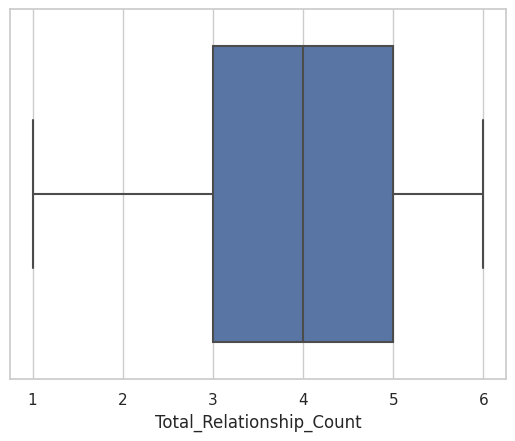

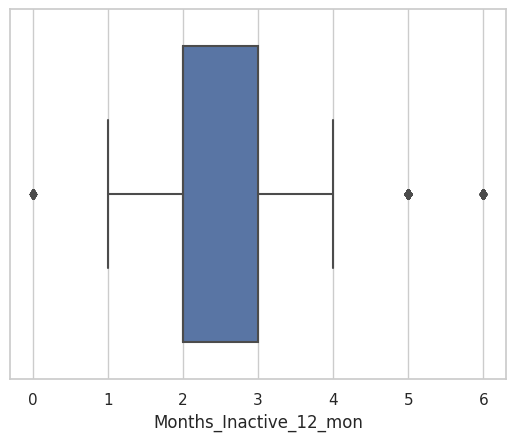

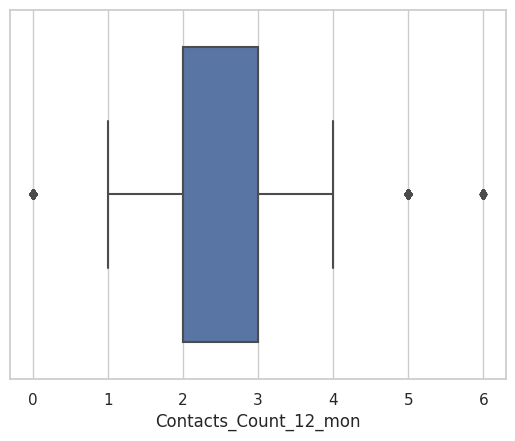

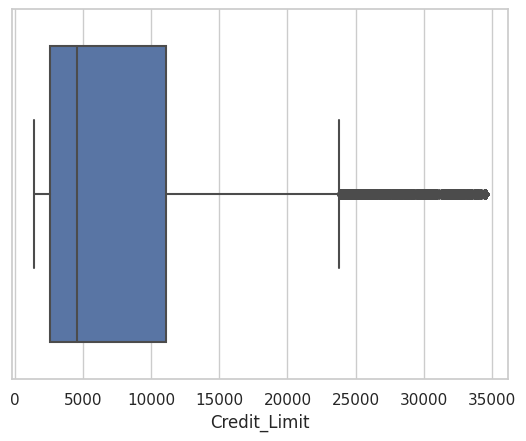

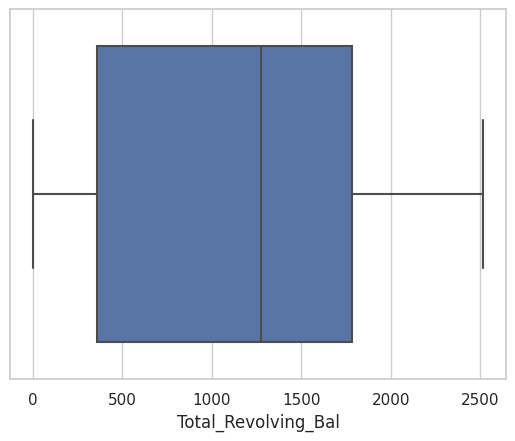

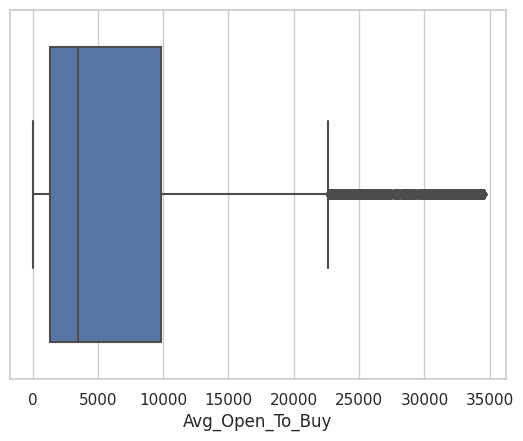

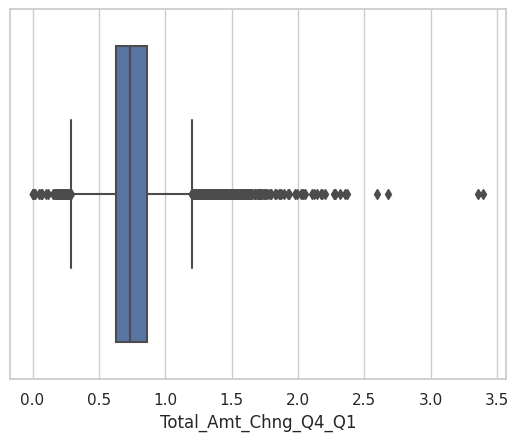

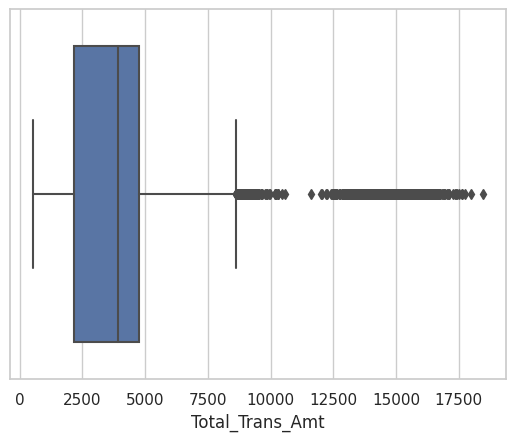

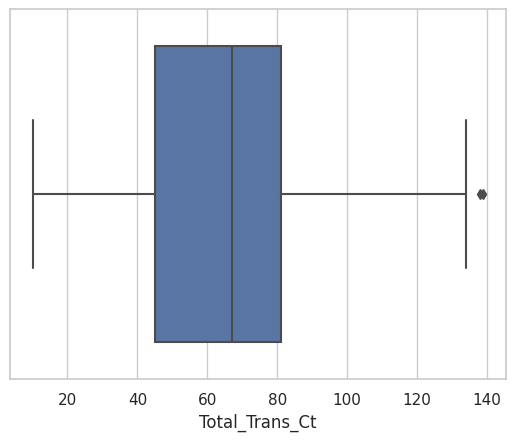

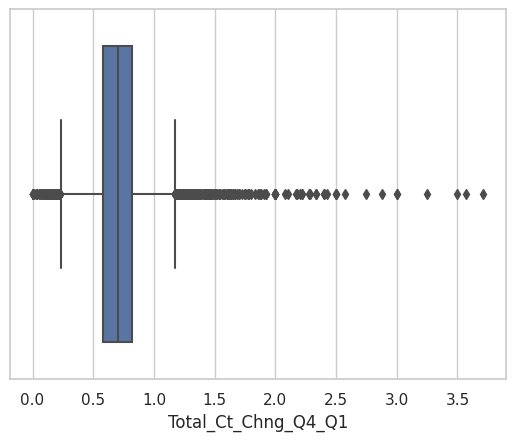

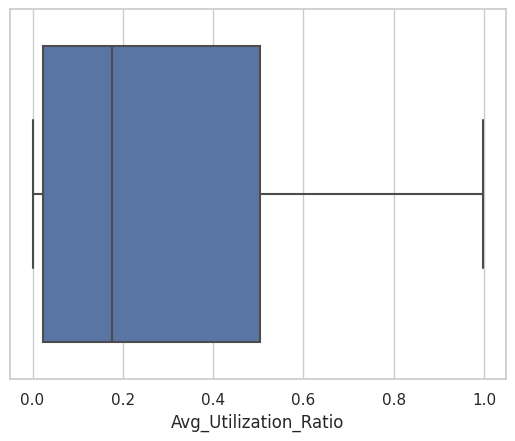

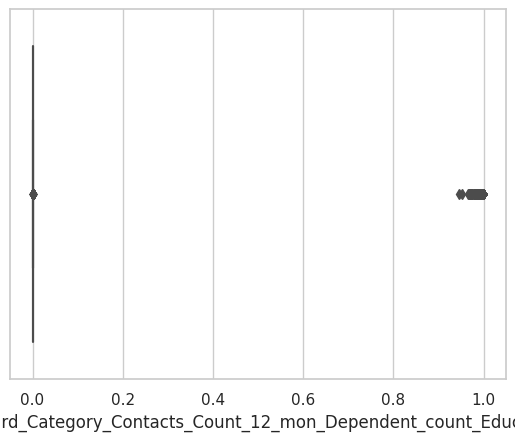

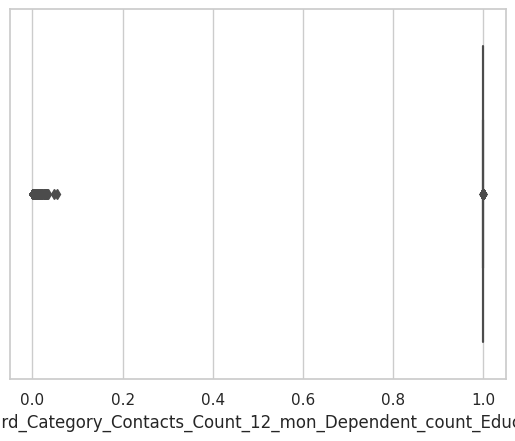

In [44]:
#outliers
def boxplots(col):
    sns.boxplot(x=x[col])
    plt.show()
    
for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [45]:
# Lets check the number of outliers per columns
Q1= x.quantile(0.25)
Q3= x.quantile(0.75)
IQR= Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
print(UL)
print(LL)

Attrition_Flag                                                                                                                            1.000000
Customer_Age                                                                                                                             68.500000
Gender                                                                                                                                    2.500000
Dependent_count                                                                                                                           6.000000
Education_Level                                                                                                                           9.500000
Marital_Status                                                                                                                            3.500000
Income_Category                                                                                                       

In [46]:
(x>UL) | (x<LL)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
10123,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
10124,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
10125,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [47]:
((x>UL) | (x<LL)).sum()

Attrition_Flag                                                                                                                        1627
Customer_Age                                                                                                                             2
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                          0
Marital_Status                                                                                                                           0
Income_Category                                                                                                                          0
Months_on_book             

In [48]:
x[((x>UL) | (x<LL))] = np.NaN

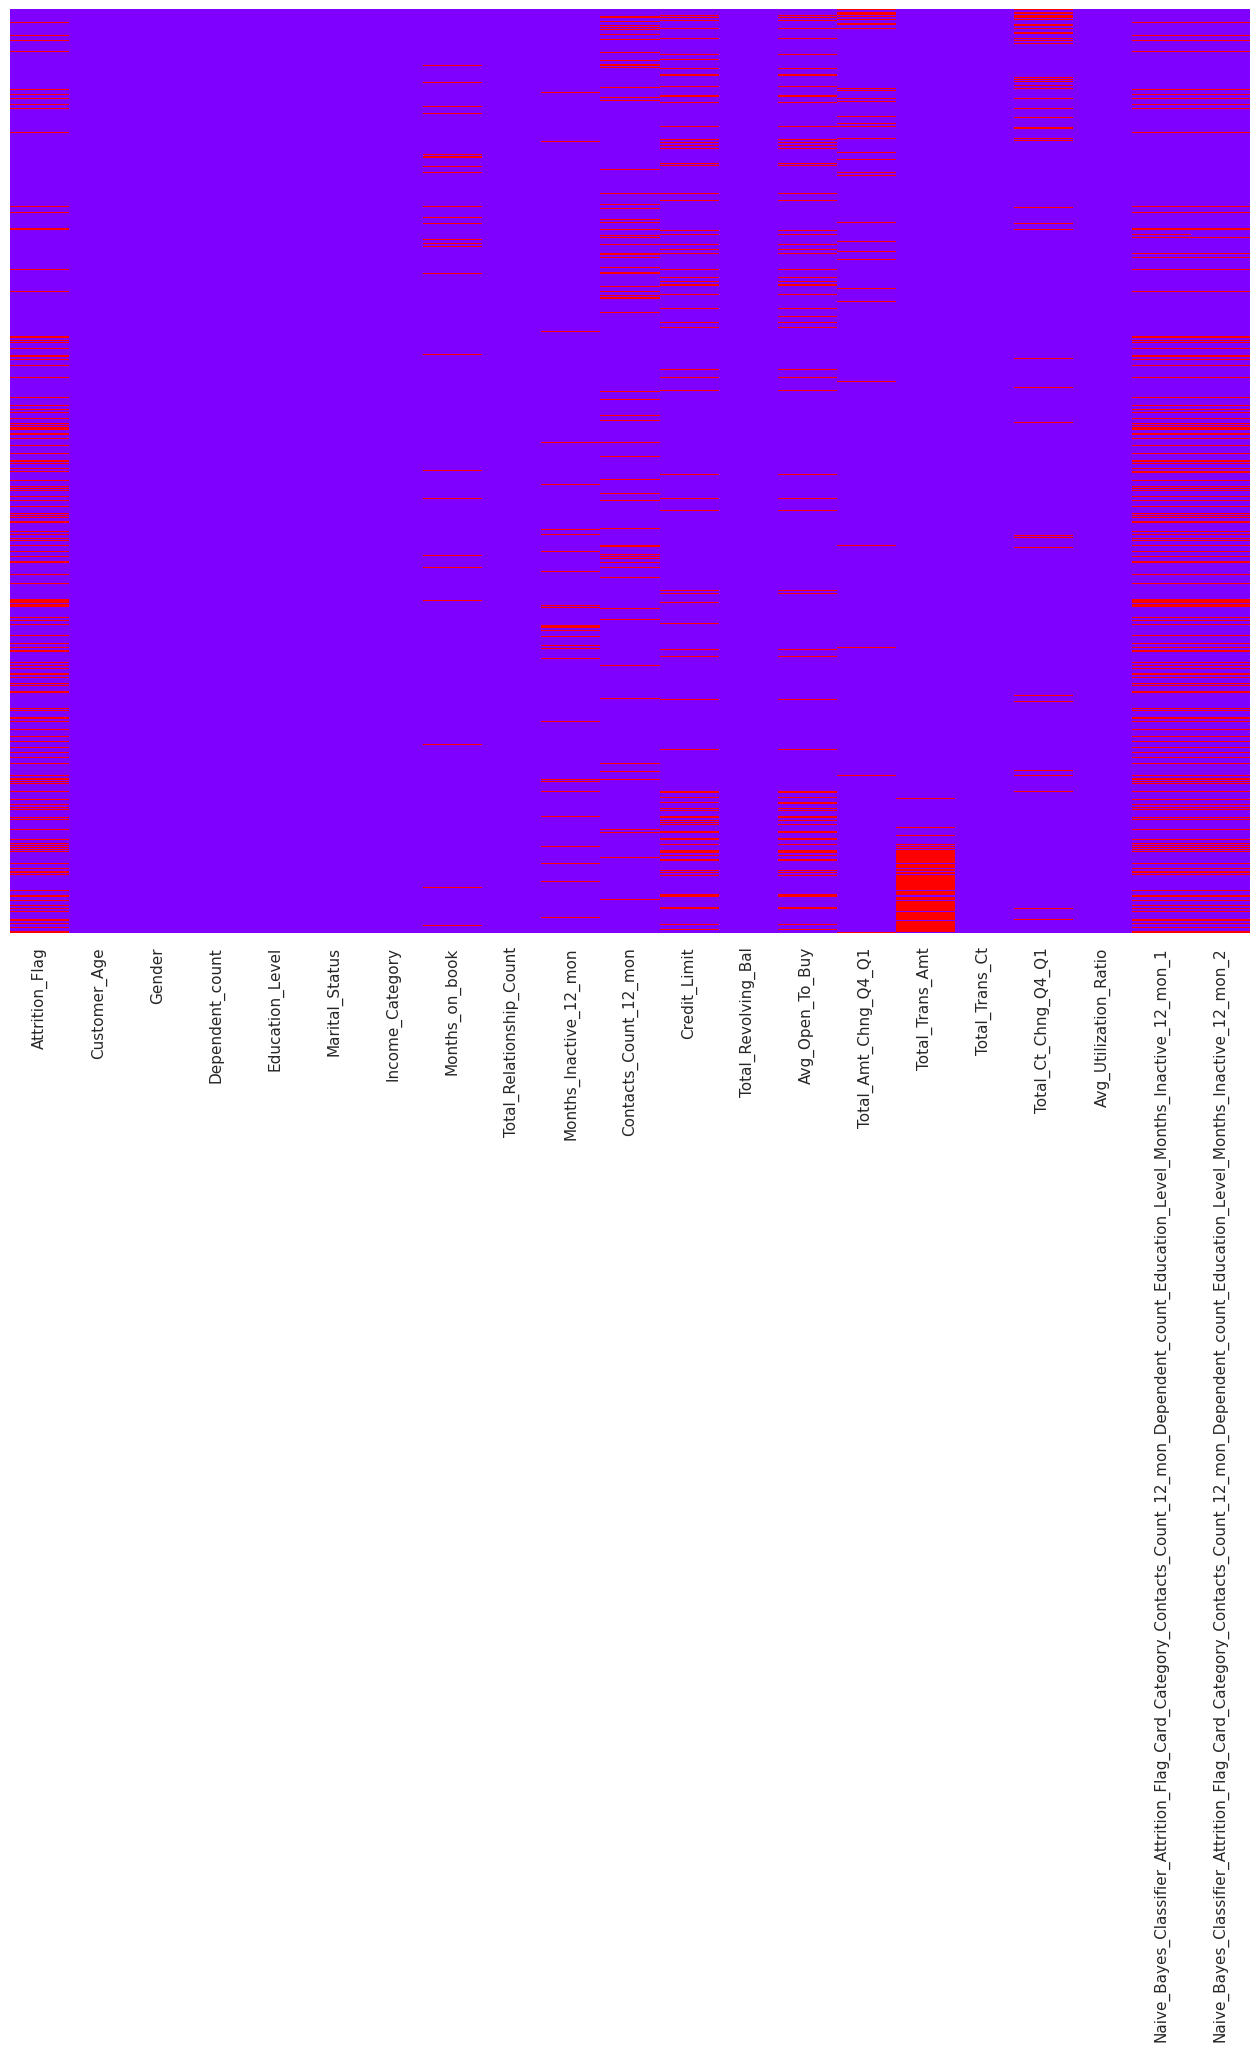

In [49]:
plt.figure(figsize=(16,12))
sns.heatmap(x.isnull(), cbar=False, cmap='rainbow', yticklabels=False)
plt.show()

In [50]:
# Applying capping method by using KNN imputation

In [51]:
from sklearn.impute import KNNImputer 
imputer=KNNImputer(n_neighbors=5)
x_impute=pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x_impute

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,39.0,5.0,1.0,...,12691.0,777.0,11914.0,0.7828,1144.0,42.0,0.8412,0.061,0.000093,0.999910
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,44.0,6.0,1.0,...,8256.0,864.0,7392.0,0.7524,1291.0,33.0,0.8408,0.105,0.000057,0.999940
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,36.0,4.0,1.0,...,3418.0,0.0,3418.0,0.7050,1887.0,20.0,0.5522,0.000,0.000021,0.999980
3,1.0,40.0,0.0,4.0,3.0,3.0,4.0,34.0,3.0,4.0,...,3313.0,2517.0,796.0,0.8256,1171.0,20.0,0.8286,0.760,0.000134,0.999870
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,21.0,5.0,1.0,...,4716.0,0.0,4716.0,0.8498,816.0,28.0,0.8014,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,50.0,1.0,2.0,2.0,2.0,1.0,40.0,3.0,2.0,...,4003.0,1851.0,2152.0,0.7030,4724.2,117.0,0.8570,0.462,0.000191,0.999810
10123,1.0,41.0,1.0,2.0,6.0,0.0,1.0,25.0,4.0,2.0,...,4277.0,2186.0,2091.0,0.8040,5210.2,69.0,0.6830,0.511,0.000176,0.999826
10124,1.0,44.0,0.0,1.0,3.0,1.0,4.0,36.0,5.0,3.0,...,5409.0,0.0,5409.0,0.8190,3423.8,60.0,0.8180,0.000,0.000213,0.999786
10125,1.0,30.0,1.0,2.0,2.0,3.0,1.0,36.0,4.0,3.0,...,5281.0,0.0,5281.0,0.5350,8395.0,62.0,0.7220,0.000,0.000114,0.999888


In [52]:
x_impute.isnull().sum().sum()

0

In [53]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x_impute), columns=x_impute.columns)

In [54]:
x_scaled

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.0,-0.164953,1.059956,0.503368,-0.052637,-0.628128,-0.574182,0.445664,0.763943,-1.482982,...,1.221494,-0.473422,1.286641,0.272081,-1.437527,-0.974273,0.837482,-0.775882,-0.719956,0.746519
1,0.0,0.334481,-0.943436,2.043199,-0.597678,0.727306,0.755053,1.162197,1.407306,-1.482982,...,0.361827,-0.366667,0.414460,0.084362,-1.355870,-1.358086,0.835192,-0.616276,-1.030103,0.999703
2,0.0,0.584198,1.059956,0.503368,-0.597678,-0.628128,0.090436,0.015744,0.120579,-1.482982,...,-0.575957,-1.426858,-0.352024,-0.208332,-1.024798,-1.912482,-0.817059,-0.997155,-1.333409,1.337282
3,0.0,-0.789247,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.270869,-0.522785,2.064559,...,-0.596310,1.661686,-0.857742,0.536369,-1.422529,-1.912482,0.765346,1.759686,-0.379080,0.408940
4,0.0,-0.789247,1.059956,0.503368,1.037447,-0.628128,-0.574182,-2.133855,0.763943,-1.482982,...,-0.324356,-1.426858,-0.101673,0.685803,-1.619727,-1.571315,0.609625,-0.997155,-1.328365,1.337282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.459340,1.059956,-0.266547,-0.597678,0.727306,-1.238799,0.588971,-0.522785,-0.300468,...,-0.462562,0.844455,-0.596204,-0.220681,0.551236,2.224169,0.927938,0.678714,0.110635,-0.097429
10123,0.0,-0.664388,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-1.560629,0.120579,-0.300468,...,-0.409451,1.255524,-0.607969,0.402990,0.821204,0.177166,-0.068222,0.856458,-0.021423,0.037603
10124,0.0,-0.289812,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,0.015744,0.763943,0.882045,...,-0.190027,-1.426858,0.031990,0.495615,-0.171122,-0.206647,0.704661,-0.997155,0.295918,-0.299976
10125,0.0,-2.037833,1.059956,-0.266547,-0.597678,2.082739,-1.238799,0.015744,0.120579,0.882045,...,-0.214838,-1.426858,0.007302,-1.258076,2.590326,-0.121355,0.155056,-0.997155,-0.544915,0.560850


In [55]:
# split the data into training and test
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42,stratify=y)

* Feature selection
* Techniques- Correlation analysis, decesion tree, Feature importance, Random forest feature importance, gradient boosting feature importance , XGB feature importance, Regularization - ridge, lasso, elasticnet, 
* VIF- regression, permutation importance, recursive feature technique
* PCA, LDA, T-SNA

* popular- recurcive feature tec, PCA
* EDA- dtale, dataprep, pandas-profiling, Lux, plotly

In [57]:
#import dtale
#dtale.show(bank)

In [58]:
# Building ensemble model
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
pred_train_rf=rf.predict(x_train)
pred_test_rf= rf.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [61]:
print("********************Confusion matrix*******************")
print(confusion_matrix(y_train, pred_train_rf))
print("****************************")
print(confusion_matrix(y_test, pred_test_rf))

********************Confusion matrix*******************
[[7548    0    0    0]
 [   0   93    0    0]
 [   0    0   16    0]
 [   0    0    0  444]]
****************************
[[1887    0    0    1]
 [  23    0    0    0]
 [   4    0    0    0]
 [  93    0    0   18]]


In [62]:
print("********************Classification Report*******************")
print(classification_report(y_train, pred_train_rf))
print("****************************")
print(classification_report(y_test, pred_test_rf))

********************Classification Report*******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7548
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00       444

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

****************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1888
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.95      0.16      0.28       111

    accuracy                           0.94      2026
   macro avg       0.47      0.29      0.31      2026
weighted avg       0.93      0.94      0.92      2026



In [63]:
print("********************accuracy Report*******************")
print(accuracy_score(y_train, pred_train_rf))
print("****************************")
print(accuracy_score(y_test, pred_test_rf))

********************accuracy Report*******************
1.0
****************************
0.9402764067127345


In [64]:
#  RandomForest Classifier with feature selection part- recursive feature technique 

In [65]:
from sklearn.feature_selection import RFE
rf1=RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=11, step=1)
feature_1= feature_1.fit(x_train, y_train)

In [66]:
#f_df=pd.DataFrame({"feature": x_train.columns, 
 #                  'rf_importance':rf.feature_importances_}).sort_values(by='rf_importance', 
 #                                                                     ascending=False)

In [67]:
pred_train_rf1=feature_1.predict(x_train)
pred_test_rf1=feature_1.predict(x_test)

In [68]:
print("********************accuracy Report*******************")
print(accuracy_score(y_train, pred_train_rf1))
print("****************************")
print(accuracy_score(y_test, pred_test_rf1))

********************accuracy Report*******************
1.0
****************************
0.9437314906219151


In [69]:
# cross validation method
from sklearn.model_selection import cross_val_score
rf_rfe_training = cross_val_score(feature_1, x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.94574599 0.94814815 0.94814815 0.9382716  0.94320988 0.94074074
 0.94814815 0.94691358 0.94320988 0.95432099]

0.9456857103712837


In [70]:
# PCA Method

In [71]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca_fit=pca.fit_transform(x_scaled)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(pca_fit, y, test_size=0.2, random_state=42,stratify=y)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [74]:
pred_train_gb=gb.predict(x_train)
pred_test_gb= gb.predict(x_test)

In [75]:
print("********************accuracy Report*******************")
print(accuracy_score(y_train, pred_train_gb))
print("****************************")
print(accuracy_score(y_test, pred_test_gb))

********************accuracy Report*******************
0.9488951981236884
****************************
0.928923988153998
